# BC3 Clustering customers

## Initial Setup

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import ceil
from datetime import timedelta, datetime
import os
import re
import warnings
import itertools
import collections

warnings.filterwarnings('ignore')

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import is_color_like

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import umap
import umap.plot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [3]:
COLORS = ['#e06666', '#e88b81', '#f0ad9a', '#f8ceb2', '#ffeeca', '#c6cfbf', '#8fb0ae', '#58919d', '#20718b']

CAT_COLORS = ['#20718b', '#7DB082', '#FAEC73', '#ECA052', '#e06666']
CONTRAST_COLORS = [COLORS[i] for i in range(len(COLORS)) if (i%2) == 0]

DIV_COLORS = ['#e06666', '#e68d8d', '#ebb1b1', '#efd3d3', '#f4f4f4', '#bed3da', '#8ab2bf', '#5592a5', '#20718b']

DIV_COL_HALF = ['#f4f4f4', '#bed3da', '#8ab2bf', '#5592a5', '#20718b']

UMP_COLORS = ['#22446D', '#FC9E4F', '#AB2346' ,'#6ABB5D']

DEFAULT_PALETTE = sns.color_palette(COLORS)
CONTRAST_PALETTE = sns.color_palette(CONTRAST_COLORS)
DIVERGENT_PALETTE = sns.color_palette(DIV_COLORS)
DIVHALF_PALETTE = sns.color_palette(DIV_COL_HALF)
CAT_PALETTE = sns.color_palette(CAT_COLORS)
UMP_PALETTE = sns.color_palette(UMP_COLORS)


DIV_CMAP = LinearSegmentedColormap.from_list("div_colors", DIV_COLORS)
DIV_H_CMAP = LinearSegmentedColormap.from_list("div_colors", DIV_COL_HALF)
CAT_CMAP = LinearSegmentedColormap.from_list("cat_colors", CAT_COLORS)
UMP_CMAP = LinearSegmentedColormap.from_list("ump_colors", UMP_COLORS)


SHOW_PLOTS = True
SAVE_PLOTS = True
RANDOM_STATE = 9

IMG_PATH = 'imgs/'
DATA_PATH = 'data/'


In [4]:
def save_fig(title, fig):
    if SAVE_PLOTS == True:
        fn = IMG_PATH + title.replace(' ','-') + '.png'
        fig.savefig(fn, bbox_inches='tight', transparent=True)
        


In [5]:
sns.set(style="white")

sns.set_context("paper")
sns.set_palette(DEFAULT_PALETTE)


plt.rcParams['figure.dpi'] = 128

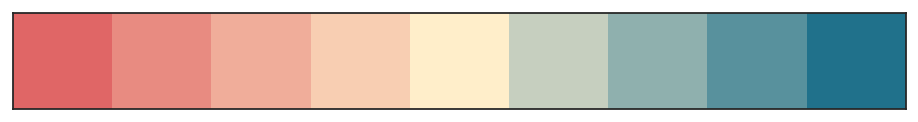

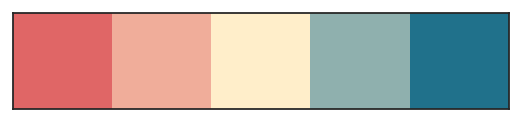

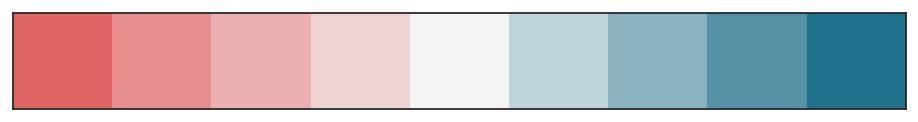

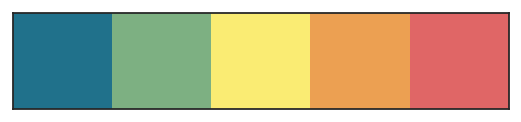

In [6]:
sns.palplot(DEFAULT_PALETTE)
sns.palplot(CONTRAST_PALETTE)
sns.palplot(DIVERGENT_PALETTE)
sns.palplot(CAT_PALETTE)
plt.show()

## Load data

In [7]:
df = pd.read_csv("../customer_agg.csv", index_col='CustomerID')

df

,unique_items,total_items,total_invoices,total_value,ave_value
CustomerID,,,,,
12346,1,74215,1,77183.60,77183.600000
12347,86,2458,7,4310.00,23.681319
12348,21,2332,4,1437.24,53.231111
12349,69,630,1,1457.55,20.243750
12350,16,196,1,294.40,18.400000
...,...,...,...,...,...
18280,9,45,1,180.60,18.060000
18281,7,54,1,80.82,11.545714
18282,12,103,2,178.05,14.837500


In [8]:
def plot_labels(df, labels, title='Data Visualization', label_map=None):    
    l = labels
    lmap = {}
    
    if label_map:
        l2 = labels.copy()
        for i in range(len(label_map)):
            lmap[label_map[i]] = i
        l = l2.replace(lmap)
        
    fig, ax = plt.subplots(figsize=(10,10))

    scatter = ax.scatter(x=df[0], y=df[1], c=l, cmap=UMP_CMAP,\
               s=2, marker="o", alpha=.5, label='Final Clusters')

    ncol = len(labels.unique().tolist())
    ncol = round(ncol/2) + 1 if ncol > 7 else ncol
    if label_map == None:
        legend1 = ax.legend(*scatter.legend_elements(),
                        bbox_to_anchor=(.5,1,.5,1), loc="lower left", frameon=False,
                        mode='expand', borderaxespad=0, ncol=ncol,
                       )


    ax.set_xticklabels('')
    ax.set_yticklabels('')
    plt.title(title, loc='left')
    
    if SAVE_PLOTS:
        save_fig(title, fig)

    plt.show()

In [9]:
scaler    = StandardScaler().fit(df[df.columns])
scaled_data = scaler.transform(df[df.columns])


In [10]:
umap_data = umap.UMAP(random_state=RANDOM_STATE, metric='euclidean', min_dist=1, 
                      n_neighbors=150, n_components=2)\
                    .fit_transform(scaled_data)

umap_data_df = pd.DataFrame(umap_data)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Kmeans

In [17]:
customer_kmeans = KMeans(n_clusters=2, init='k-means++', 
                         max_iter=1000, random_state=RANDOM_STATE)

umap_data_df['kmeans'] = customer_kmeans.fit_predict(scaled_data)


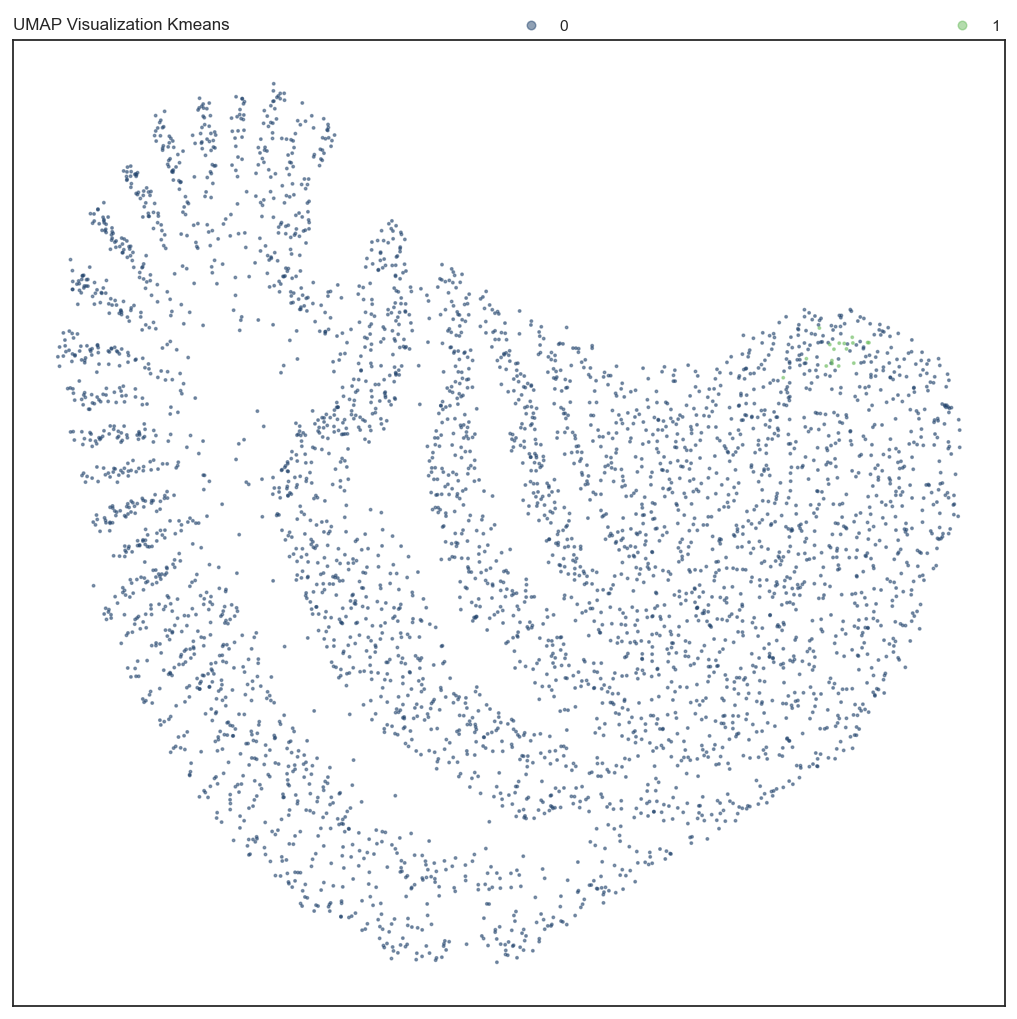

In [18]:
plot_labels(umap_data_df.iloc[:,0:2], umap_data_df['kmeans'], 'UMAP Visualization Kmeans')